In [3]:
import pandas as pd
import numpy as np
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

In [62]:
train1 = pd.read_csv("data/train.csv", sep = ",")
test = pd.read_csv("data/test.csv", sep = ",")

In [63]:
train1.head()

,Time,X692,X1272,X553,X1299,X4,X598,X1003,X1010,X1216,...,X1164,X656,X1287,X324,X767,X1271,X1288,X58,X1033,X1163
0,2016-07-26 11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-26 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-26 13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-26 14:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-26 15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
test.head()

,Time,X26,X303,X241,X435,X402,X352,X305,X350,X326,...,X283,X329,X223,X266,X20,X443,X347,X75,X107,X230
0,2017.7.1 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.275,0.021,NaN
1,2017.7.1 1:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.222,0.021,NaN
2,2017.7.1 2:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.237,0.021,NaN
3,2017.7.1 3:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229,0.020,NaN
4,2017.7.1 4:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202,0.021,NaN


In [65]:
train1.shape

(16909, 1301)

In [66]:
# 데이터가 1도 없는 칼럼 추출
stats = train1.describe()
nullcols = [i for i in range(0, 1300) if stats.iloc[0][i] == 0]

In [67]:
stats

,X692,X1272,X553,X1299,X4,X598,X1003,X1010,X1216,X1047,...,X1164,X656,X1287,X324,X767,X1271,X1288,X58,X1033,X1163
count,3064.000000,3065.000000,3041.000000,3006.000000,0.0,3041.000000,2937.000000,3048.000000,3064.000000,3062.000000,...,3040.000000,3066.000000,3035.000000,6766.000000,3040.000000,3065.000000,3034.000000,1747.000000,3044.000000,3041.000000
mean,0.371506,0.410571,0.519877,0.260363,NaN,0.268325,0.378017,0.424614,0.302138,0.273101,...,0.410577,0.441267,0.271726,0.141011,0.384662,0.552852,0.487484,2.881876,0.356959,0.339762
std,0.190358,0.272845,0.236184,0.231955,NaN,0.149223,0.267603,0.267227,0.157183,0.184067,...,0.270049,0.295568,0.146547,0.116648,0.254653,0.386933,0.277884,1.915190,0.189310,0.198999
min,0.049000,0.066000,0.053000,0.017000,NaN,0.034000,0.052000,0.052000,0.071000,0.037000,...,0.058000,0.074000,0.022000,0.007000,0.048000,0.045000,0.041000,0.216000,0.038000,0.057000
25%,0.271000,0.225000,0.416000,0.114000,NaN,0.162000,0.207000,0.285000,0.212000,0.163000,...,0.266000,0.242000,0.198000,0.055000,0.214000,0.251000,0.280000,1.360500,0.242000,0.218000
50%,0.329000,0.338000,0.485000,0.176500,NaN,0.228000,0.274000,0.347500,0.281000,0.216000,...,0.332000,0.384000,0.233000,0.122000,0.317500,0.477000,0.432000,2.469000,0.326000,0.290000
75%,0.430000,0.536000,0.581000,0.339000,NaN,0.346000,0.483000,0.466000,0.344000,0.313750,...,0.475000,0.545000,0.309500,0.173000,0.500000,0.758000,0.663750,4.209500,0.432250,0.449000
max,4.104000,4.837000,6.232000,5.624000,NaN,2.718000,5.418000,4.426000,2.899000,2.684000,...,5.929000,4.562000,3.209000,1.768000,4.443000,7.773000,4.414000,9.088000,3.921000,5.049000


In [68]:
nullcols

[4, 286, 622, 756, 834, 915, 1024, 1241]

In [69]:
stats.columns[nullcols]

Index(['X4', 'X24', 'X64', 'X3', 'X22', 'X45', 'X1', 'X34'], dtype='object')

In [70]:
# 칼럼 제거
train = train1.drop(stats.columns[nullcols], axis=1)

In [71]:
train.shape

(16909, 1293)

In [73]:
# Time 데이터 타입 변환 및 인덱스 설정
train['Time'] = pd.to_datetime(train.Time)
train = train.set_index('Time')

test['Time'] = pd.to_datetime(test.Time)
test = test.set_index('Time')

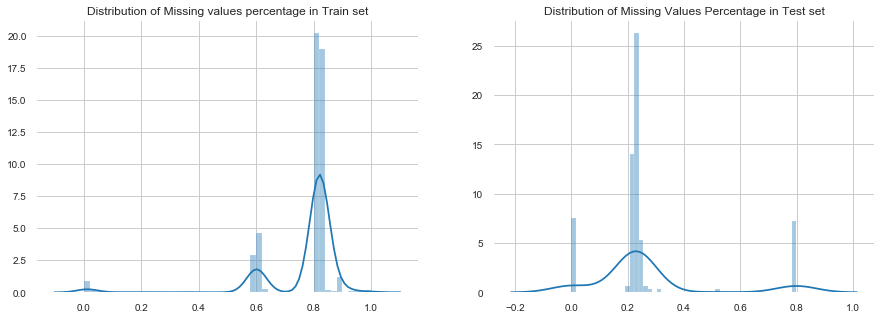

In [77]:
# Missing values 확인
_, ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(train.isnull().mean(axis=0), ax=ax[0])
ax[0].set_title("Distribution of Missing values percentage in Train set")

sns.distplot(test.isnull().mean(axis=0), ax=ax[1])
ax[1].set_title('Distribution of Missing Values Percentage in Test set')
plt.show()

In [80]:
train.head()

,X692,X1272,X553,X1299,X598,X1003,X1010,X1216,X1047,X381,...,X1164,X656,X1287,X324,X767,X1271,X1288,X58,X1033,X1163
Time,,,,,,,,,,,,,,,,,,,,,
2016-07-26 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
